In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load Data
심장병 자료를 불러온다.

In [0]:
df =pd.read_csv('heart.csv')

데이터가 올바르게 읽혀졌는지 확인한다.

In [0]:
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains; 

* age - 나이
* sex - 0 = 여성, 1 = 남성 
* cp - chest pain 유형
* trestbps - 휴식시 혈압 
* chol - 혈청 콜레스트롤(mg/dl )
* fbs - 혈당 수치( > 120 mg/dl, 1= true, 0 = false) 
* restecg - 휴식시 심전도 결과
* thalach - 최대심박수
* exang - 협심증 유무(1 = yes, 0 = no) 
* oldpeak - ST depression induced by exercise relative to rest 
* slope - the slope of the peak exercise ST segment 
* ca - number of major vessels (0-3) colored by flourosopy 
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
* target - 심장병 유무(1=yes, 0=no)

데이터에 결측값이 존재하는지 확인한다.

In [0]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

히스토그램을 이용하여 데이터 구조를 파악한다.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


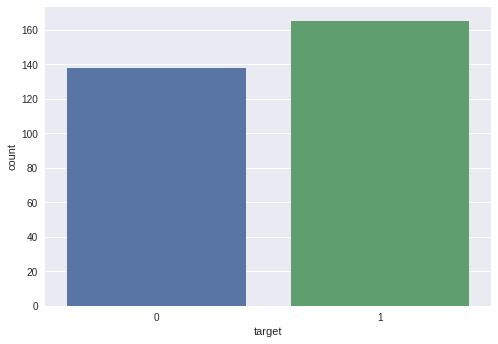

In [0]:
import seaborn as sns

sns.countplot(df['target'])

## 전처리

범주형 변수들을 get_dummies() 함수를 이용해 변환한다.

In [0]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [0]:
cat_list=['sex','cp','fbs','restecg','exang','slope','ca','thal']
for i in cat_list:
    heart[i]=pd.Categorical(heart[i])

In [0]:
heart=pd.get_dummies(heart)

# Train test split

In [0]:
features = df.drop(['target'],axis=1)
target = df.target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.2, random_state = 0)

In [0]:
print('X train shape : {}'.format(X_train.shape[0]))
print('X test shape : {}'.format(X_test.shape[0]))
print('y train shape : {}'.format(y_train.shape[0]))
print('y test shape : {}'.format(y_test.shape[0]))

X train shape : 242
X test shape : 61
y train shape : 242
y test shape : 61


# KNN
---
기본모형 

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)

n_neighbors : 이웃의 수

weights : 예측에 사용될 가중치 함수

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.639344262295082

GridSearchCV를 이용하여 최적의 이웃의 수를 찾는다.

In [0]:
from sklearn.grid_search import GridSearchCV


neighbors = list(range(1, 51)) # 이웃의 수는 1 ~ 50

param_grid = dict(n_neighbors=neighbors)

grid = GridSearchCV(knn, param_grid, cv =  10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [0]:
grid.grid_scores_

[mean: 0.59917, std: 0.08188, params: {'n_neighbors': 1},
 mean: 0.60331, std: 0.09267, params: {'n_neighbors': 2},
 mean: 0.62397, std: 0.13304, params: {'n_neighbors': 3},
 mean: 0.62810, std: 0.08376, params: {'n_neighbors': 4},
 mean: 0.61983, std: 0.06024, params: {'n_neighbors': 5},
 mean: 0.63223, std: 0.08159, params: {'n_neighbors': 6},
 mean: 0.64876, std: 0.08777, params: {'n_neighbors': 7},
 mean: 0.64463, std: 0.09353, params: {'n_neighbors': 8},
 mean: 0.61983, std: 0.08155, params: {'n_neighbors': 9},
 mean: 0.63636, std: 0.10521, params: {'n_neighbors': 10},
 mean: 0.60744, std: 0.06265, params: {'n_neighbors': 11},
 mean: 0.61157, std: 0.08476, params: {'n_neighbors': 12},
 mean: 0.62397, std: 0.05507, params: {'n_neighbors': 13},
 mean: 0.61570, std: 0.08635, params: {'n_neighbors': 14},
 mean: 0.61983, std: 0.06223, params: {'n_neighbors': 15},
 mean: 0.64876, std: 0.09812, params: {'n_neighbors': 16},
 mean: 0.63636, std: 0.10185, params: {'n_neighbors': 17},
 mean:

그래프를 그려 이웃의 수에 따른 Score를 확인한다.

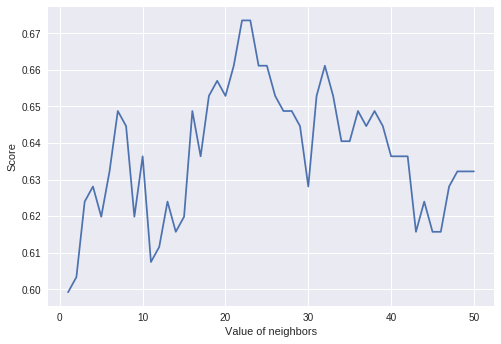

In [0]:
grid_scores = [result.mean_validation_score for result in grid.grid_scores_]

plt.plot(neighbors, grid_scores)
plt.xlabel('Value of neighbors')
plt.ylabel('Score')
plt.show()

In [0]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6735537190082644
{'n_neighbors': 22}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=22, p=2,
           weights='uniform')


In [0]:
grid.score(X_test,y_test)

0.6885245901639344

RandomizedSearchCV를 이용하여 최적의 이웃의 수를 찾는다.


*   매개 변수 중 일부만 Random하게 검색한다. (n_iter로 반복횟수 제어)
*   시간이 오래 걸릴 경우 시간을 조절하기 위해서 사용된다.



In [0]:
from sklearn.grid_search import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.2, random_state = 0)

neighbors = list(range(1, 51)) # 이웃의 수는 1 ~ 50
weights = ['uniform', 'distance']

param_grid = dict(n_neighbors=neighbors, weights=weights)

iters = 20

grid = RandomizedSearchCV(knn, param_grid, cv =  10, scoring='accuracy', n_iter=iters, random_state=0)
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          scoring='accuracy', verbose=0)

In [0]:
grid.grid_scores_

[mean: 0.61570, std: 0.08635, params: {'weights': 'uniform', 'n_neighbors': 14},
 mean: 0.62397, std: 0.11483, params: {'weights': 'uniform', 'n_neighbors': 44},
 mean: 0.60331, std: 0.09267, params: {'weights': 'uniform', 'n_neighbors': 2},
 mean: 0.64050, std: 0.08135, params: {'weights': 'distance', 'n_neighbors': 28},
 mean: 0.64876, std: 0.08276, params: {'weights': 'distance', 'n_neighbors': 38},
 mean: 0.63223, std: 0.10065, params: {'weights': 'distance', 'n_neighbors': 47},
 mean: 0.61983, std: 0.08155, params: {'weights': 'uniform', 'n_neighbors': 9},
 mean: 0.64050, std: 0.09335, params: {'weights': 'distance', 'n_neighbors': 37},
 mean: 0.64876, std: 0.10406, params: {'weights': 'uniform', 'n_neighbors': 28},
 mean: 0.63223, std: 0.09533, params: {'weights': 'distance', 'n_neighbors': 48},
 mean: 0.64876, std: 0.09704, params: {'weights': 'distance', 'n_neighbors': 27},
 mean: 0.62810, std: 0.12163, params: {'weights': 'uniform', 'n_neighbors': 47},
 mean: 0.63636, std: 0.1

In [0]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6487603305785123
{'weights': 'distance', 'n_neighbors': 38}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=38, p=2,
           weights='distance')


In [0]:
grid.score(X_test,y_test)

0.7049180327868853

# Target과 Feature들 간의 연관성 분석

Heatmap을 그려 Target과 Feature간 연관성을 확인한다.

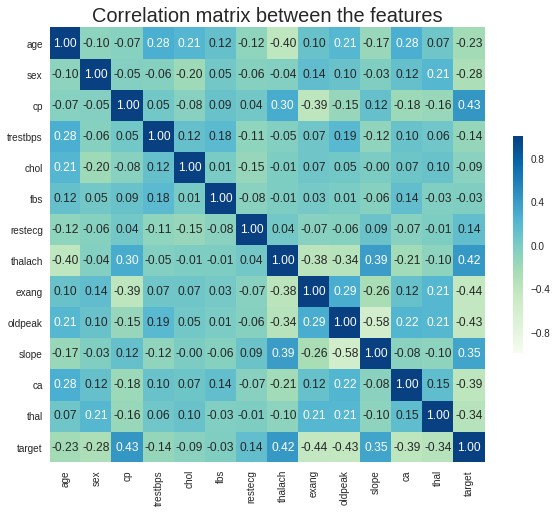

In [0]:

correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(correlation_matrix, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
plt.title('Correlation matrix between the features', fontsize=20)
plt.show()

막대그래프를 그려 Target과 Feature들과의 연관성을 확인한다.

In [0]:
def display_corr_with_col(df, col):
    correlation_matrix = df.corr()
    correlation_type = correlation_matrix[col].copy()
    abs_correlation_type = correlation_type.apply(lambda x: abs(x))
    desc_corr_values = abs_correlation_type.sort_values(ascending=False)
    y_values = list(desc_corr_values.values)[1:]
    x_values = range(0,len(y_values))
    xlabels = list(desc_corr_values.keys())[1:]
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.bar(x_values, y_values)
    ax.set_title('The correlation of all features with target', fontsize=20)
    ax.set_ylabel('Pearson correlatie coefficient [abs waarde]', fontsize=16)
    plt.xticks(x_values, xlabels, rotation='vertical')
    plt.show()

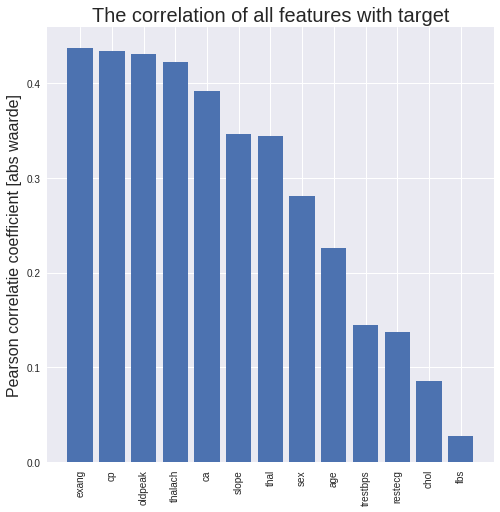

In [0]:
display_corr_with_col(df, 'target')

# SVC
-----
Support vector machine은 두 카테고리 중 어느 하나에 속한 데이터의 집합이 주어졌을 때, SVM 알고리즘은 주어진 데이터 집합을 바탕으로하여 새로운 데이터가 어느 카테고리에 속할지 판단한다. 

![Support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Svm_max_sep_hyperplane_with_margin.png/220px-Svm_max_sep_hyperplane_with_margin.png)

Support vector machine은 분류 또는 회귀 분석에 사용 가능한 초평면(Hyperplane)을 지닌다. 

초평면이 가장 가까운 학습 데이터 점과 큰 차이를 가지고 있으면 분류 오차가 가장 작기 때문에 좋은 분류를 위해서는 어떤 분류된 점에 대해서 가장 가까운 학습 데이터와 가장 먼 거리를 가지는 초평면을 찾아야한다. 

그러나 초평면은 항상 선형 모양을 지닐 수 없기에 더 높은 차원으로 대응 시키는 **커널 함수**를 이용한다.

### SVC의 매개변수
class sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

C : 오차항의 패널티

gamma : 커널계수

In [0]:

from sklearn.svm import SVC

In [0]:
svm = SVC(kernel = 'rbf', gamma='auto', C=1.0, random_state =0)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm.score(X_test, y_test)

0.5901639344262295

classification_report와 confusion_matrix를 이용하여 어떻게 예측하였는지확인한다.

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.07      0.14        27
          1       0.58      1.00      0.73        34

avg / total       0.76      0.59      0.47        61

[[ 2 25]
 [ 0 34]]


confusion matrix로 확인결과 총 61개의 테스트데이터 중 25개가 잘못 분류 되었다.

때문에 GridSearchCV를 이용하여 매개변수를 조절하고자 한다.

In [0]:
C = [0.1, 1, 10, 100, 100]
gamma = [0.0001, 0.001, 0.01, 0.1, 1]
#kernel = ['linear','rbf']
kernel = ['rbf']

param_grid = {'C': C,'gamma':gamma, 'kernel':kernel}

grid = GridSearchCV(SVC(),param_grid, cv= 5, verbose=2)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ........................ C=0.1, gamma=0.0001, kernel=rbf -   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ........................ C=0.1, gamma=0.0001, kernel=rbf -   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ........................ C=0.1, gamma=0.0001, kernel=rbf -   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ........................ C=0.1, gamma=0.0001, kernel=rbf -   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ........................ C=0.1, gamma=0.0001, kernel=rbf -   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ......................... C=0.1, gamma=0.001, kernel=rbf -   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ..........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......................... C=1, gamma=0.0001, kernel=rbf -   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........................... C=1, gamma=0.001, kernel=rbf -   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........................... C=1, gamma=0.001, kernel=rbf -   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........................... C=1, gamma=0.001, kernel=rbf -   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........................... C=1, gamma=0.001, kernel=rbf -   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........................... C=1, gamma=0.001, kernel=rbf -   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ............................ C=1, gamma=0.01, kernel=rbf -   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [0]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7479338842975206
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearch 결과 svm의 매개변수는 C가 0.1, Gamma가 0.0001 그리고 커널이 'Linear'일때 가장 높은 Score를 얻을 수 있었다.

In [0]:
predic = grid.predict(X_test)

In [0]:
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

             precision    recall  f1-score   support

          0       0.90      0.67      0.77        27
          1       0.78      0.94      0.85        34

avg / total       0.83      0.82      0.81        61

[[18  9]
 [ 2 32]]


In [0]:
grid.score(X_test,y_test)

0.819672131147541

In [0]:
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(C), len(gamma))

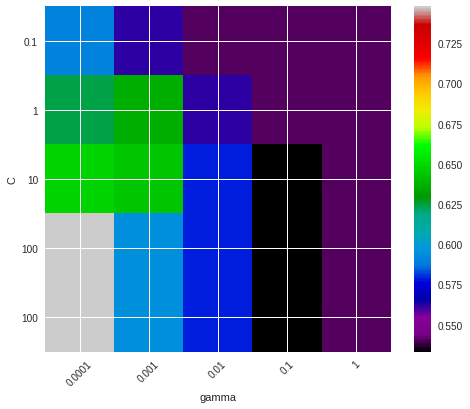

In [0]:
import pylab as pl

pl.figure(figsize=(8, 6))
pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, interpolation='nearest', cmap=pl.cm.spectral)
pl.xlabel('gamma')
pl.ylabel('C')
pl.colorbar()
pl.xticks(np.arange(len(gamma)), gamma, rotation=45)
pl.yticks(np.arange(len(C)), C)
pl.show()